1. Do histogram equalization on pout-dark and display the same
2. Do histogram matching (specification) on the pout-dark image, keeping pout-bright as a reference image.

    <ins>Note</ins>: 
    Use predefined as well as user defined functions for the above problems.
Pout-dark

In [1]:
# This Assignment is done by CS20B1044 Avinash R Changrani
# importing required libraries

import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

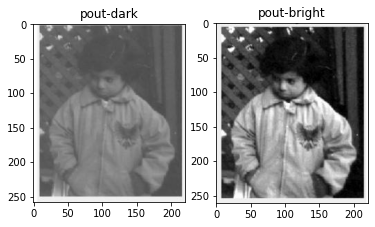

In [2]:
pout_dark = cv2.imread('pout-dark.jpg')

pout_bright = cv2.imread('pout-bright.jpg')

# displaying both the images side by side
plt.subplot(1,2,1)
plt.imshow(pout_dark)
plt.title('pout-dark')
plt.subplot(1,2,2)
plt.imshow(pout_bright)
plt.title('pout-bright')
plt.show()

In [3]:
# Do histogram equalization on pout-dark and display the same

# converting the image to grayscale
pout_dark_gray = cv2.cvtColor(pout_dark, cv2.COLOR_BGR2GRAY)

# userdefined function to do histogram equalization
def hist_eq(img):
    # getting the shape of the image
    m,n = img.shape
    # creating a histogram
    hist = np.zeros(256)
    # creating a new image
    new_img = np.zeros((m,n))
    # calculating the histogram
    for i in range(m):
        for j in range(n):
            hist[img[i,j]] += 1
    # calculating the cumulative histogram
    cum_hist = np.zeros(256)
    cum_hist[0] = hist[0]
    for i in range(1,256):
        cum_hist[i] = cum_hist[i-1] + hist[i]
    # calculating the probability of each pixel
    prob = np.zeros(256)
    for i in range(256):
        prob[i] = cum_hist[i]/(m*n)
    # calculating the new pixel values
    for i in range(m):
        for j in range(n):
            new_img[i,j] = math.floor(prob[img[i,j]]*255)
    # returning the new image
    return new_img


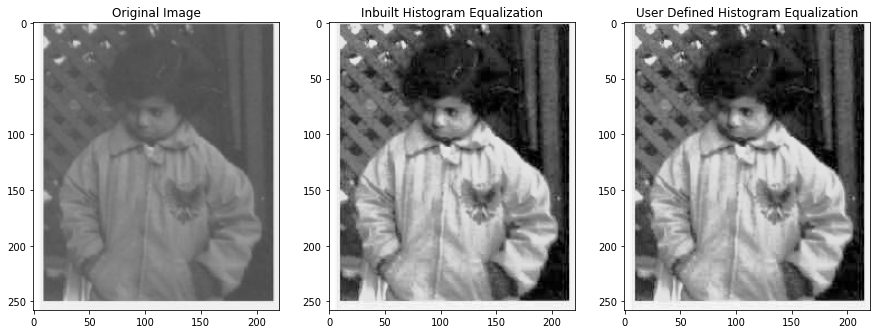

In [4]:
# inbuilt function to do histogram equalization
pout_dark_eq_inbuilt = cv2.equalizeHist(pout_dark_gray)

# calling the userdefined function
pout_dark_eq_user = hist_eq(pout_dark_gray)

# displaying the images side by side using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(pout_dark, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(pout_dark_eq_inbuilt, cmap='gray')
axs[1].set_title('Inbuilt Histogram Equalization')
axs[2].imshow(pout_dark_eq_user, cmap='gray')
axs[2].set_title('User Defined Histogram Equalization')
plt.show()

### Conclusion:
>Histogram equalization is a method used in image processing to improve the contrast of an image by redistributing the pixel intensities across the full range of values. This process stretches the pixel intensities in the image, making the darker parts of the image darker and the lighter parts of the image lighter, revealing image details that were previously hidden.

In [5]:
# Do histogram matching on pout-dark and pout-bright and display the same
# User defined function to do histogram matching
def histogram_matching_user(input_img, ref_img):
    # Convert the input and reference images to LAB color space
    input_lab = cv2.cvtColor(input_img, cv2.COLOR_BGR2LAB)
    ref_lab = cv2.cvtColor(ref_img, cv2.COLOR_BGR2LAB)

    # Compute the histograms and CDFs of the input and reference images
    input_hist, bins = np.histogram(input_lab[:,:,0], 256, [0, 256])
    input_cdf = np.cumsum(input_hist) / (input_lab.shape[0] * input_lab.shape[1])
    ref_hist, bins = np.histogram(ref_lab[:,:,0], 256, [0, 256])
    ref_cdf = np.cumsum(ref_hist) / (ref_lab.shape[0] * ref_lab.shape[1])

    # Compute the mapping function between the input and reference CDFs
    mapping = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        j = 255
        while j >= 0 and ref_cdf[j] > input_cdf[i]:
            j -= 1
        mapping[i] = j

    # Apply the mapping function to the input image
    matched_lab = input_lab.copy()
    matched_lab[:,:,0] = mapping[matched_lab[:,:,0]]
    matched_img = cv2.cvtColor(matched_lab, cv2.COLOR_LAB2BGR)
    return matched_img

# Inbuilt function to do histogram matching
def histogram_matching_inbuilt(input_img, ref_img):
    # Convert the input and reference images to LAB color space
    input_lab = cv2.cvtColor(input_img, cv2.COLOR_BGR2LAB)
    ref_lab = cv2.cvtColor(ref_img, cv2.COLOR_BGR2LAB)

    # Split the LAB channels
    input_l, input_a, input_b = cv2.split(input_lab)
    ref_l, ref_a, ref_b = cv2.split(ref_lab)

    # Apply histogram matching to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    matched_l = clahe.apply(input_l, ref_l)

    # Merge the matched L channel with the original A and B channels
    matched_lab = cv2.merge((matched_l, input_a, input_b))

    # Convert the matched LAB image back to BGR color space
    matched_img = cv2.cvtColor(matched_lab, cv2.COLOR_LAB2BGR)
    return matched_img


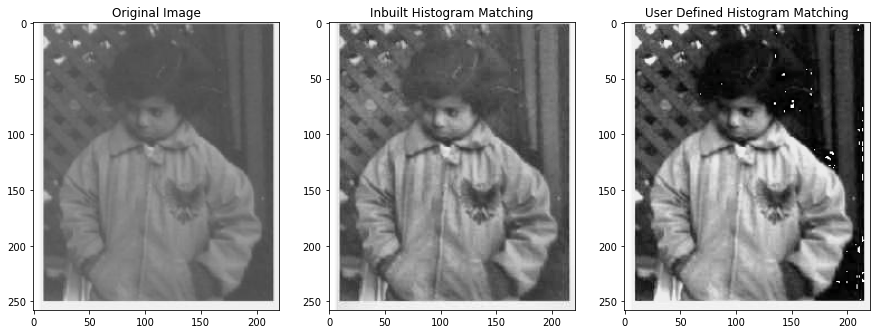

In [6]:
# histogram matching using inbuilt function

matched_img_inbuilt = histogram_matching_inbuilt(pout_dark, pout_bright)

# histogram matching using user defined function

matched_img_user = histogram_matching_user(pout_dark, pout_bright)

# displaying the images side by side using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(pout_dark, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(matched_img_inbuilt, cmap='gray')
axs[1].set_title('Inbuilt Histogram Matching')
axs[2].imshow(matched_img_user, cmap='gray')
axs[2].set_title('User Defined Histogram Matching')
plt.show()

## Conclusion :

> Histogram matching is a technique used to adjust the brightness and contrast of an image based on the intensity distribution of another image. This technique can improve the contrast and adjust the brightness of the input image, as well as transfer the color characteristics of one image to another.